## Lending Club Case Study

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

## Load and Prepare Data Set

In [4]:
# Load data set
loan = pd.read_csv('loan.csv')

In [5]:
# display first five rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# display the number of rows and columns
loan.shape

(39717, 111)

In [7]:
# display data volumn and types 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Quality Assessment

### Check Missing Values

In [8]:
# Percentage up the missing values (column-wise)
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
#mean of missing values column-wise
loan.isnull().mean()

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

In [10]:
# dropping columns having mean of missing values greater than 0.5
loan=loan[loan.columns[loan.isnull().mean() < 0.5]]

In [11]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
# desciption of desc column
loan['desc'].describe()

count     26777
unique    26527
top            
freq        210
Name: desc, dtype: object

In [13]:
loan['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [14]:
# removing rows in desc column having null value
loan=loan.loc[loan['desc'].notnull()]

In [15]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     5.99
emp_length                    2.35
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                          0.00
purpose                       0.00
title                         0.02
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc            

In [16]:
loan['emp_title'].describe()

count       25173
unique      20156
top       US Army
freq           82
Name: emp_title, dtype: object

In [17]:
loan['emp_title'].head()

0                          NaN
1                        Ryder
3          AIR RESOURCES BOARD
4     University Medical Group
6    Southern Star Photography
Name: emp_title, dtype: object

In [18]:
# removing rows in emp_title column having null value
loan=loan.loc[loan['emp_title'].notnull()]

In [19]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    0.15
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                          0.00
purpose                       0.00
title                         0.02
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc            

In [20]:
loan['pub_rec_bankruptcies'].describe(percentiles=[.25,.50,.75,.90,.99])

count    24522.000000
mean         0.041432
std          0.200109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
99%          1.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [21]:
loan.drop('pub_rec_bankruptcies', axis=1, inplace=True)

In [22]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    0.15
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                          0.00
purpose                       0.00
title                         0.02
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc            

In [23]:
loan[['chargeoff_within_12_mths','collections_12_mths_ex_med']].describe()

,chargeoff_within_12_mths,collections_12_mths_ex_med
count,25129.0,25129.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [24]:
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1, inplace=True)

In [25]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.15
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                       0.00
purpose                    0.00
title                      0.02
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_ut

In [26]:
loan['last_pymnt_d'].describe()

count      25132
unique       101
top       May-16
freq         724
Name: last_pymnt_d, dtype: object

In [27]:
# removing rows having null value in last_pymnt_d column
loan=loan.loc[loan['last_pymnt_d'].notnull()]

In [28]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.15
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                       0.00
purpose                    0.00
title                      0.02
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_ut

In [29]:
loan['emp_length'].describe()

count         25094
unique           11
top       10+ years
freq           5501
Name: emp_length, dtype: object

In [30]:
loan['emp_length'].head()

1     < 1 year
3    10+ years
4       1 year
6      8 years
7      9 years
Name: emp_length, dtype: object

In [31]:
# removing rows having null value in emp_length column
loan=loan.loc[loan['emp_length'].notnull()]

In [32]:
loan['revol_util'].describe()

count     25064
unique     1049
top          0%
freq        593
Name: revol_util, dtype: object

In [33]:
# removing rows having null value in revol_util column
loan=loan.loc[loan['revol_util'].notnull()]

In [34]:
loan['tax_liens'].describe()

count    25035.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [35]:
loan.drop('tax_liens', axis=1, inplace=True)

In [36]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
desc                       0.00
purpose                    0.00
title                      0.02
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_ut

In [37]:
loan['title'].describe()

count                  25059
unique                 13774
top       Debt Consolidation
freq                    1404
Name: title, dtype: object

In [38]:
# removing rows having null value in title column
loan=loan.loc[loan['title'].notnull()]

In [39]:
# again cheaking the percentage of missing values
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
desc                       0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_ac

In [40]:
# increasing range of diplay columns
pd.set_option('display.max_columns', 500)

# displaying the data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,1,INDIVIDUAL,0,0


In [41]:
loan[['delinq_amnt','acc_now_delinq','policy_code','pub_rec','delinq_2yrs']].describe(percentiles=[.25, .50, .75, .90, .99])

,delinq_amnt,acc_now_delinq,policy_code,pub_rec,delinq_2yrs
count,25059.0,25059.0,25059.0,25059.000000,25059.000000
mean,0.0,0.0,1.0,0.053913,0.143342
std,0.0,0.0,0.0,0.234859,0.478241
min,0.0,0.0,1.0,0.000000,0.000000
25%,0.0,0.0,1.0,0.000000,0.000000
50%,0.0,0.0,1.0,0.000000,0.000000
75%,0.0,0.0,1.0,0.000000,0.000000
90%,0.0,0.0,1.0,0.000000,1.000000
99%,0.0,0.0,1.0,1.000000,2.000000
max,0.0,0.0,1.0,3.000000,11.000000


In [42]:
# creating list of columns
drop_col1 = ['delinq_amnt','acc_now_delinq','policy_code','pub_rec','delinq_2yrs']

# dropping the columns
loan.drop(drop_col1, axis=1, inplace=True)

In [43]:
# displaying the number of rows and columns of loan dataframe
loan.shape

(25059, 45)

In [44]:
loan.drop(['id','member_id'], axis=1, inplace=True)

In [45]:
# removing the rows containg Current as loan_status.
loan = loan.loc[loan['loan_status']!='Current']

In [46]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,10,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,17726,85.60%,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,8221,87.50%,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,INDIVIDUAL
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,2,9279,36.50%,3,f,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,INDIVIDUAL


In [47]:
loan['application_type'].describe()

count          24380
unique             1
top       INDIVIDUAL
freq           24380
Name: application_type, dtype: object

In [48]:
# dropping the application_type column
loan.drop('application_type', axis=1, inplace=True)

In [49]:
# dropping the url column
loan.drop('url', axis=1, inplace=True)

In [50]:
loan['initial_list_status'].describe()

count     24380
unique        1
top           f
freq      24380
Name: initial_list_status, dtype: object

In [51]:
loan.drop('initial_list_status',axis=1,inplace=True)

In [52]:
loan['pymnt_plan'].describe()

count     24380
unique        1
top           n
freq      24380
Name: pymnt_plan, dtype: object

In [53]:
loan.drop('pymnt_plan',axis=1,inplace=True)

In [54]:
loan[['recoveries','collection_recovery_fee','total_rec_late_fee','out_prncp_inv']].describe(percentiles=[.25,.50,.75,.90,.99])

,recoveries,collection_recovery_fee,total_rec_late_fee,out_prncp_inv
count,24380.000000,24380.000000,24380.000000,24380.0
mean,98.191112,13.457979,1.465226,0.0
std,691.717930,152.895855,7.647218,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.0
90%,11.860000,0.000000,0.000000,0.0
99%,2199.227000,337.730796,37.094130,0.0
max,22943.370000,6543.040000,166.429711,0.0


In [55]:
#dropping the columns recoveries, collection_recovery_fee, total_rec_late_fee and out_prncp_inv 
loan.drop(['recoveries','collection_recovery_fee','total_rec_late_fee','out_prncp_inv'], axis=1, inplace=True)

In [56]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.40%,4,0.0,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,10,5598,21%,37,0.0,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,17726,85.60%,11,0.0,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,8221,87.50%,4,0.0,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,2,9279,36.50%,3,0.0,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,Mar-13


In [57]:
loan[['int_rate','revol_util']].describe()

,int_rate,revol_util
count,24380,24380
unique,365,1048
top,10.99%,0%
freq,549,579


In [58]:
# removing the % sign from int_rate and revol_util
loan['int_rate']=[i.split('%') for i in loan['int_rate']]
loan['revol_util']=[i.split('%') for i in loan['revol_util']]

In [59]:
# conversion of string data type to float datatype
loan['int_rate']=[float(i[0]) for i in loan['int_rate']]
loan['revol_util']=[float(i[0]) for i in loan['revol_util']]

In [60]:
loan[['int_rate','revol_util']].describe()

,int_rate,revol_util
count,24380.000000,24380.000000
mean,11.971111,48.733625
std,3.591556,28.147295
min,5.420000,0.000000
25%,9.320000,25.500000
50%,11.830000,49.100000
75%,14.270000,71.900000
max,24.400000,99.900000


## Handling outliers

In [61]:
loan.describe(percentiles=[.25,.50,.75,.90,.99])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,2.438000e+04,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000,24380.0,24380.000000,24380.000000,24380.000000,24380.000000,24380.000000
mean,11425.333265,11130.866489,10365.653332,11.971111,334.016058,6.912076e+04,13.366053,0.884578,9.397252,13583.766612,48.733625,22.228261,0.0,12264.122278,11453.136364,9976.467355,2187.998692,2809.118349
std,7224.352344,6965.132051,6954.775268,3.591556,205.809645,5.915076e+04,6.635063,1.084275,4.371944,15739.132015,28.147295,11.348845,0.0,8702.985228,8644.603454,6918.391873,2373.817475,4486.016359
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,33.730000,0.000000,0.000000,6.220000,0.010000
25%,6000.000000,6000.000000,5000.000000,9.320000,178.110000,4.200000e+04,8.300000,0.000000,6.000000,3898.500000,25.500000,14.000000,0.0,5839.273022,5226.910000,5000.000000,704.885000,230.507500
50%,10000.000000,10000.000000,9000.000000,11.830000,296.185000,6.000000e+04,13.510000,1.000000,9.000000,9152.000000,49.100000,21.000000,0.0,10262.349065,9403.695000,8499.980000,1396.250000,604.635000
75%,15000.000000,15000.000000,14350.387563,14.270000,444.550000,8.260000e+04,18.610000,1.000000,12.000000,17322.000000,71.900000,29.000000,0.0,16607.982393,15656.137500,14000.000000,2780.337500,3622.297500
90%,22000.000000,20305.000000,19975.000000,16.770000,632.390000,1.150000e+05,22.290000,2.000000,15.000000,29589.700000,87.510000,38.000000,0.0,24382.508936,23455.146000,20000.000000,4907.470000,8732.029000
99%,35000.000000,35000.000000,33828.208117,20.890000,913.543100,2.284200e+05,26.274200,4.000000,22.000000,81830.630000,98.300000,56.000000,0.0,41072.003172,40021.463300,32000.000000,12017.769800,20799.713500
max,35000.000000,35000.000000,35000.000000,24.400000,1288.100000,3.900000e+06,29.990000,8.000000,44.000000,149588.000000,99.900000,90.000000,0.0,58563.679930,58563.680000,35000.020000,23563.680000,35479.890000


In [62]:
# Import the matplotlib.pyplot and seaborn packages

import matplotlib.pyplot as plt
import seaborn as sns

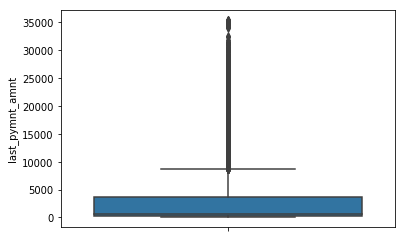

In [63]:
#ploting boxplot for last_pymnt_amnt
sns.boxplot(y=loan['last_pymnt_amnt'])
plt.show()

In [64]:
# removing the rows having greater than 10000
loan=loan.loc[loan['last_pymnt_amnt']<=10000]

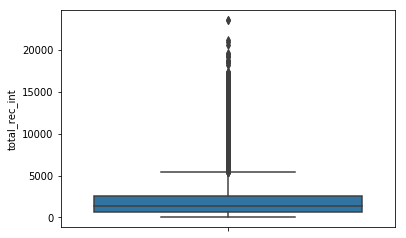

In [65]:
#ploting boxplot for total_rec_int
sns.boxplot(y=loan['total_rec_int'])
plt.show()

In [66]:
# removing the rows having greater than 5000 i.e. outliers
loan=loan.loc[loan['total_rec_int']<=5000]

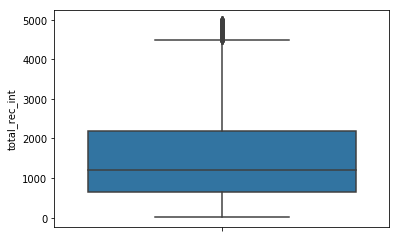

In [67]:
#ploting boxplot for total_rec_int
sns.boxplot(y=loan['total_rec_int'])
plt.show()

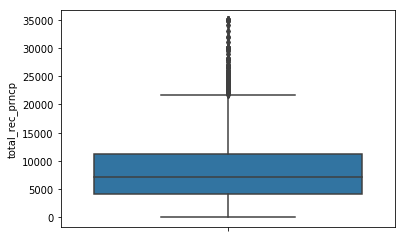

In [68]:
#ploting boxplot for total_rec_prncp
sns.boxplot(y=loan['total_rec_prncp'])
plt.show()

In [69]:
# removing the rows having greater than 21000 i.e. outliers
loan=loan.loc[loan['total_rec_prncp']<=21000]

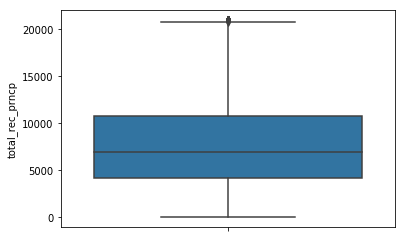

In [70]:
#ploting boxplot for total_rec_prncp
sns.boxplot(y=loan['total_rec_prncp'])
plt.show()

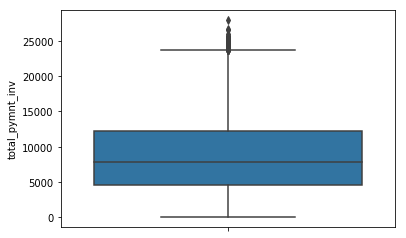

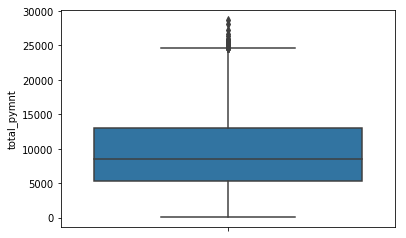

In [71]:
#ploting boxplot for total_pymnt_inv
sns.boxplot(y=loan['total_pymnt_inv'])
plt.show()

#ploting boxplot for total_pymnt
sns.boxplot(y=loan['total_pymnt'])
plt.show()

In [72]:
# removing the rows having greater than 23000 i.e. outliers
loan=loan.loc[loan['total_pymnt_inv']<=23000]

# removing the rows having greater than 25000 i.e. outliers
loan=loan.loc[loan['total_pymnt']<=24000]

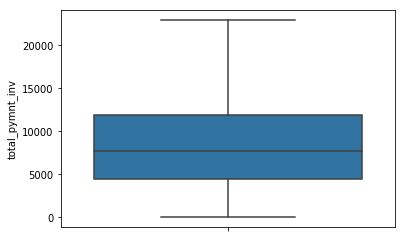

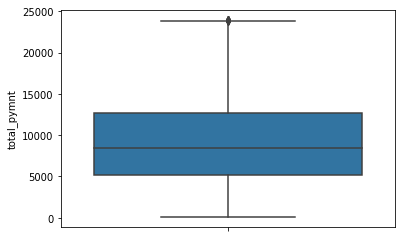

In [73]:
#ploting boxplot for total_pymnt_inv
sns.boxplot(y=loan['total_pymnt_inv'])
plt.show()

#ploting boxplot for total_pymnt
sns.boxplot(y=loan['total_pymnt'])
plt.show()

In [74]:
loan.out_prncp.describe()

count    19851.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

In [75]:
# dropping the out_prncp column
loan.drop('out_prncp',axis=1,inplace=True)

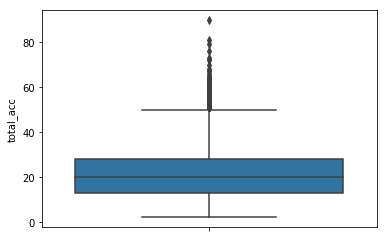

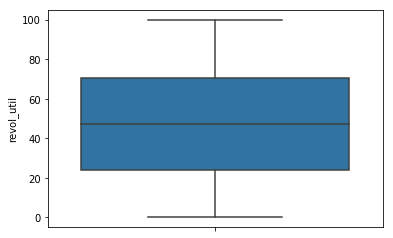

In [76]:
#ploting boxplot for total_acc
sns.boxplot(y=loan['total_acc'])
plt.show()

#ploting boxplot for revol_util
sns.boxplot(y=loan['revol_util'])
plt.show()

In [77]:
# removing the rows having greater than 50 for column total_acc i.e. outliers
loan=loan.loc[loan['total_acc']<=50]

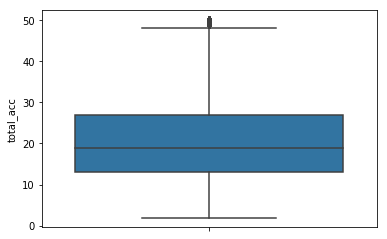

In [78]:
#ploting boxplot for total_acc
sns.boxplot(y=loan['total_acc'])
plt.show()

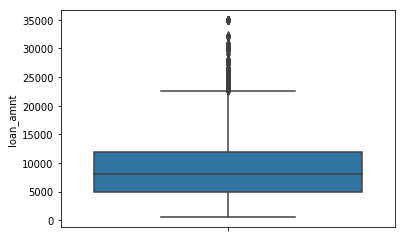

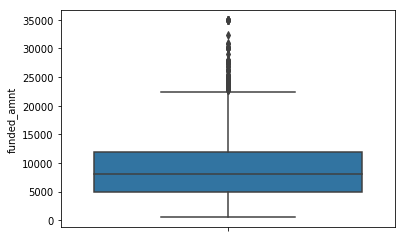

In [79]:
#ploting boxplot for loan_amnt
sns.boxplot(y=loan['loan_amnt'])
plt.show()

#ploting boxplot for funded_amnt
sns.boxplot(y=loan['funded_amnt'])
plt.show()

In [80]:
# removing the rows having greater than 22000 i.e. outliers
loan=loan.loc[loan['loan_amnt']<=22000]

# removing the rows having greater than 22000 i.e. outliers
loan=loan.loc[loan['funded_amnt']<=22000]

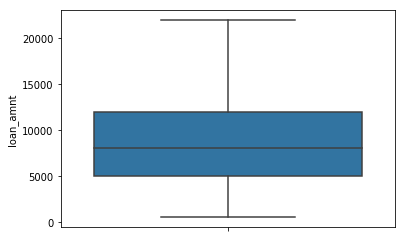

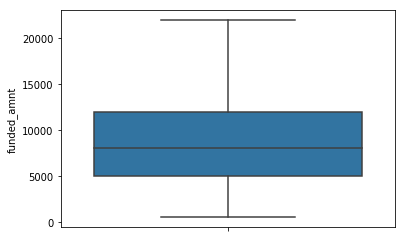

In [81]:
#ploting boxplot for loan_amnt
sns.boxplot(y=loan['loan_amnt'])
plt.show()

#ploting boxplot for funded_amnt
sns.boxplot(y=loan['funded_amnt'])
plt.show()

In [82]:
# as values of funded_amnt_inv are similer to funded_amnt
# removing the rows having greater than 22000 i.e. outliers
loan=loan.loc[loan['funded_amnt_inv']<=22000]

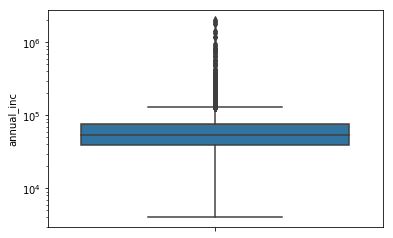

In [83]:
#ploting boxplot for annual_inc
sns.boxplot(y=loan['annual_inc'])
plt.yscale('log')
plt.show()

In [84]:
loan.shape

(19181, 34)

## Univariate analysis

In [85]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,17726,85.6,11,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,8221,87.5,4,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,2,9279,36.5,3,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,Mar-13


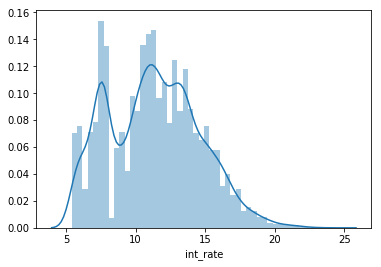

In [86]:
# plot for int_rate
sns.distplot(loan.int_rate)
plt.show()

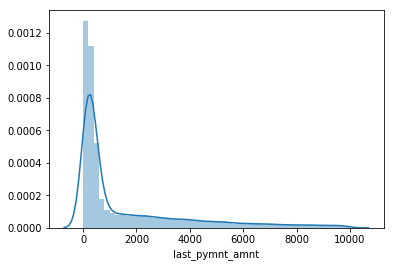

In [87]:
# plot for int_rate
sns.distplot(loan.last_pymnt_amnt)
plt.show()

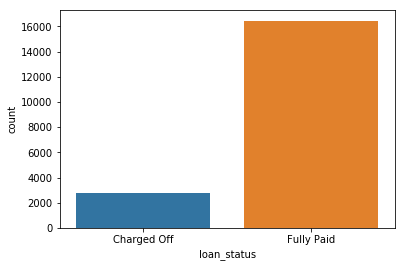

In [88]:
# plotting count plot for loan_status
sns.countplot(loan.loan_status)
plt.show()

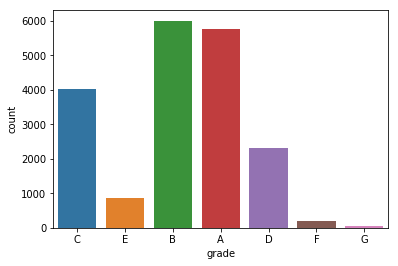

In [89]:
# plotting count plot for grade
sns.countplot(loan.grade)
plt.show()

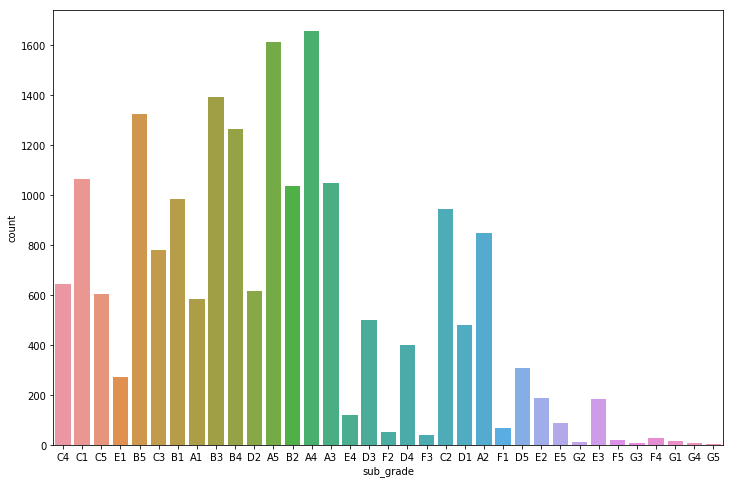

In [90]:
# figure size
plt.figure(figsize=(12, 8))
# plotting count plot for sub_grade
sns.countplot(loan.sub_grade)
plt.show()



## Bivariate analysis

In [91]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,17726,85.6,11,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,8221,87.5,4,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,2,9279,36.5,3,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,Mar-13


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


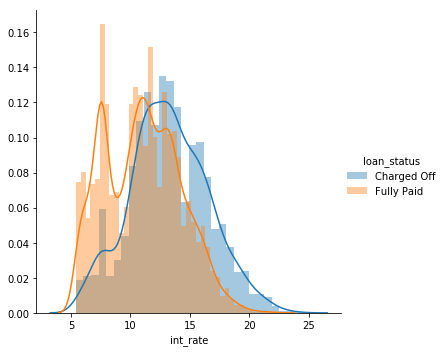

In [92]:
#plotting the loan_status with respect to the int_rate
sns.FacetGrid(loan,hue='loan_status',size=5).map(sns.distplot,'int_rate').add_legend()
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


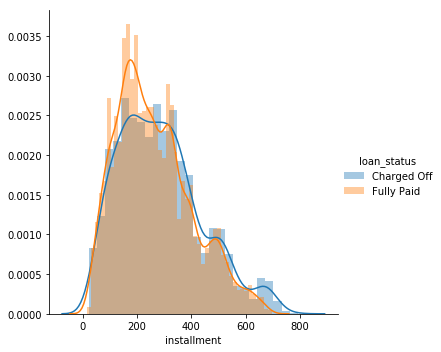

In [93]:
#plotting the loan_status with respect to the installment
sns.FacetGrid(loan,hue='loan_status',size=5).map(sns.distplot,'installment').add_legend()
plt.show()

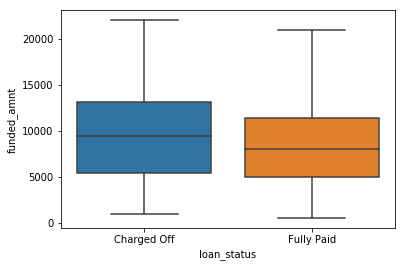

In [94]:
# boxplot of loan_status across various loan_amnt
sns.boxplot(x='loan_status', y='funded_amnt', data=loan)
#plt.yscale('log')
plt.show()

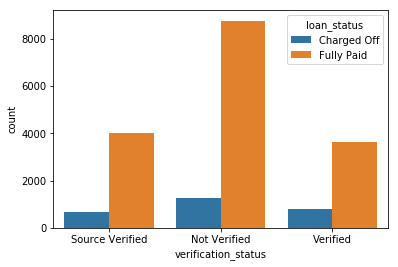

In [95]:
# ploting loan_status with respect to the verification_status
sns.countplot('verification_status', hue = 'loan_status', data=loan)
plt.show()

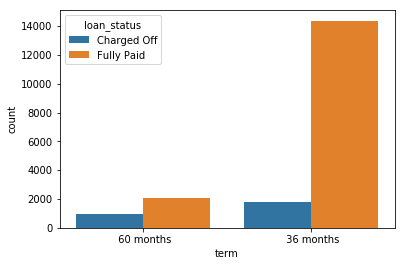

In [96]:
# ploting loan_status with respect to the home_ownership
sns.countplot('term', hue = 'loan_status', data=loan)
plt.show()

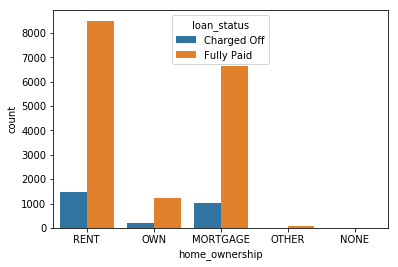

In [97]:
# ploting loan_status with respect to the home_ownership
sns.countplot('home_ownership', hue = 'loan_status', data=loan)
plt.show()



## Multivariate analysis

In [98]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,Feb-96,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,17726,85.6,11,10110.840000,10110.84,6985.61,3125.23,May-16,1313.76,May-16
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,8221,87.5,4,3939.135294,3939.14,3000.00,939.14,Jan-15,111.34,Dec-14
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,Sep-04,0,2,9279,36.5,3,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,Mar-13


In [99]:
loan.shape

(19181, 34)

In [100]:
# creating loan_status1 column.
loan['loan_status1'] = loan.loan_status.apply(lambda x: 1 if x=='Fully Paid' else 0)

In [101]:
loan.loan_status1.head()

1    0
3    1
6    1
7    1
9    0
Name: loan_status1, dtype: int64

In [102]:
# Pivoting the data using 'grade' and 'sub_grade'
piv_table = pd.pivot_table(loan, index='loan_status',values='loan_status1', columns=['grade','sub_grade'], aggfunc='count')
piv_table

grade          A                          B                           C       \
sub_grade     A1   A2   A3    A4    A5   B1   B2    B3    B4    B5   C1   C2   
loan_status                                                                    
Charged Off   16   41   47    92   123   94  121   181   173   195  185  159   
Fully Paid   568  807  999  1565  1490  891  913  1212  1090  1128  877  786   

grade                         D                        E                    \
sub_grade     C3   C4   C5   D1   D2   D3   D4   D5   E1   E2   E3  E4  E5   
loan_status                                                                  
Charged Off  139  108  113   91  148  121  104   93   87   57   56  44  33   
Fully Paid   640  535  492  390  466  380  295  213  186  132  127  77  55   

grade         F                  G              
sub_grade    F1  F2  F3  F4  F5 G1 G2 G3 G4 G5  
loan_status                                     
Charged Off  29  19  16   9  13  6  7  5  5  2  
Fully Paid   40  33  22  17   7  8  4  2  1  1

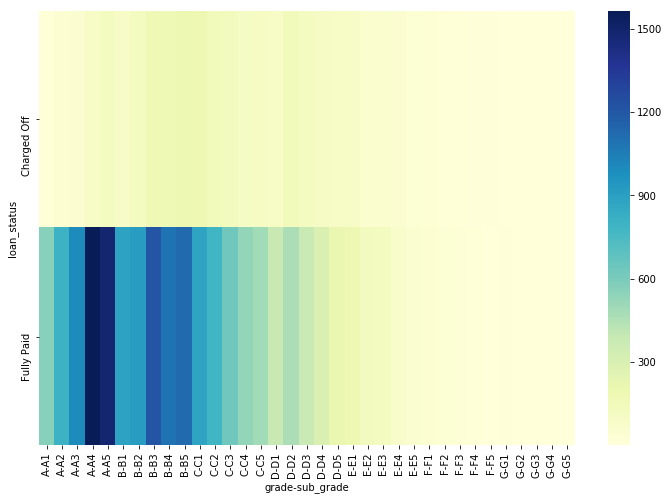

In [103]:
# figure size
plt.figure(figsize=(12, 8))

# heatmap of the piv_table with a color map of choice
sns.heatmap(piv_table, cmap="YlGnBu")
plt.show()